# Introduction

This project aims to analyze biodiversity within four prominent national parks in the United States: Bryce Canyon, Great Smoky Mountains, Yellowstone, and Yosemite. Using Python, we will explore species observations, conservation statuses, and their ecological implications.

The analysis will address the following key questions:

**1. Species Observations**
- *Most Observed Species*: Identify the species that are most frequently observed in each park to understand which are better adapted to these environments.
- *Variability Across Parks*: Compare species observations across the four parks to reveal significant patterns and differences in biodiversity.
- *Temporal Trends*: Analyze historical observation data to determine trends over time, including whether certain species sightings are increasing or decreasing.

**2. Species Information**
- *Species Distribution by Category*: Examine the distribution of species across categories (Amphibian, Bird, etc.) to understand which groups are most represented in each park.
- *Conservation Status*: Identify species with endangered statuses and assess how these species are distributed across the parks, providing insight into conservation needs.
- *Endemic and Rare Species*: Determine which species are endemic or rare in each park to identify priority candidates for conservation efforts.

## Data sources:

Both `Observations.csv` and `Species_info.csv` was provided by [Codecademy.com](https://www.codecademy.com).

Note: The data for this project is *inspired* by real data, but is mostly fictional.

# Import Python Modules

In [3]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

# Data Acquisition & Preparation
## Data Import
### *observations.csv*
This dataset contains records of species observations across four national parks. The fields are as follows:

- **scientific_name**: The scientific name of the species observed, following the binomial nomenclature system.
- **park_name**: The name of the national park where the observation was made. The parks included are Bryce Canyon, Great Smoky Mountains, Yellowstone, and Yosemite.
- **observations**: The number of times each species has been observed in the respective park, providing insights into species abundance and distribution.

In [6]:
observations_df = pd.read_csv("observations.csv")
observations_df.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


### *species_info.csv*
This dataset provides detailed information about various species, including their classification and conservation status. The fields are as follows:

- **category**: The taxonomic category of the species, which can include Amphibian, Bird, Fish, Mammal, Nonvascular Plant, Reptile, or Vascular Plant.
- **scientific_name**: The scientific name of the species, which matches the names in the observations dataset for easy cross-referencing.
- **common_names**: Common names or vernacular names associated with the species, providing a more relatable reference for non-scientific audiences.
- **conservation_status**: The conservation status of the species, which may be empty or indicate statuses such as Endangered, In Recovery, Species of Concern, or Threatened, highlighting the species' risk levels.

In [9]:
species_info_df = pd.read_csv("species_info.csv")
species_info_df.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


## Data Exploration & Cleaning
**observations.csv**

In [12]:
# observations_df.info()
# There are no null values, but scientific_name and park_name are mapped as objects

In [14]:
# We will start by forcing the first 2 columns being mapped as strings
observations_df['scientific_name'] = observations_df['scientific_name'].astype("string")
observations_df['park_name'] = observations_df['park_name'].astype("string")
observations_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  string
 1   park_name        23296 non-null  string
 2   observations     23296 non-null  int64 
dtypes: int64(1), string(2)
memory usage: 546.1 KB


In [16]:
# Let's check the different values for each field

for column in ["scientific_name", "park_name"]:
    nunique_values = observations_df[column].nunique()
    print(f"# of Unique values for {column}: {nunique_values}\n")

# We will do the same for observations, but we will just see the range of values we could find

print(f"Range of values for observations: [{observations_df['observations'].min()}, {observations_df['observations'].max()}]\n")

# of Unique values for scientific_name: 5541

# of Unique values for park_name: 4

Range of values for observations: [9, 321]



In [36]:
# In order to have a grasp of what type of registers and the data distribution we have, let's visualize a simple table with # unique species observed in each park and # observations on each park:

unique_species_per_park = observations_df.groupby('park_name')['scientific_name'].nunique()
print(unique_species_per_park)
# We can see that this dataset has an equal number of registers (5541) for each park

park_name
Bryce National Park                    5541
Great Smoky Mountains National Park    5541
Yellowstone National Park              5541
Yosemite National Park                 5541
Name: scientific_name, dtype: int64


In [38]:
observations_per_park = observations_df.groupby('park_name')['observations'].sum()
print(observations_per_park)
# We can see that, in terms of # animal observations, Yellowstone and Yosemite are leading the ranking while Bryce and Great Smoky Mountain and leaving behind

park_name
Bryce National Park                     576025
Great Smoky Mountains National Park     431820
Yellowstone National Park              1443562
Yosemite National Park                  863332
Name: observations, dtype: int64


**species_info.csv**

In [63]:
#species_info_df.info()
# no null values except on "conservation_status" column, where most of the values are null. All the fields are mapped as objects
# Let's convert each column to the most suitable data type:
species_info_df['category'] = species_info_df['category'].astype('category')
species_info_df['scientific_name'] = species_info_df['scientific_name'].astype('string')
species_info_df['common_names'] = species_info_df['common_names'].astype('string')
species_info_df['conservation_status'] = species_info_df['conservation_status'].astype('category')
species_info_df['conservation_status'].fillna('No Intervention', inplace=True)
species_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   category             5824 non-null   category
 1   scientific_name      5824 non-null   string  
 2   common_names         5824 non-null   string  
 3   conservation_status  5824 non-null   category
dtypes: category(2), string(2)
memory usage: 103.1 KB


In [65]:
# Let's check the different values for each field

for column in species_info_df.columns:
    nunique_values = species_info_df[column].nunique()
    print(f"# of Unique values for {column}: {nunique_values}\n")

# of Unique values for category: 7

# of Unique values for scientific_name: 5541

# of Unique values for common_names: 5504

# of Unique values for conservation_status: 5



In [83]:
# Which are the different conservation_status defined? It will be a good idea to classify them as per the risk for a species to disappear
print(f"Conservation status: {species_info_df['conservation_status'].unique()}\n")

# We have: ['No Intervention', 'Species of Concern', 'Endangered', 'Threatened', 'In Recovery']
# So the right order it seems to be: ['No Intervention', 'Species of Concern', 'In Recovery', 'Threatened', 'Endangered']

species_info_df['conservation_status'] = pd.Categorical(species_info_df['conservation_status'], ['No Intervention', 'Species of Concern', 'In Recovery', 'Threatened', 'Endangered'], ordered = True)
print(species_info_df['conservation_status'].unique())

Conservation status: ['No Intervention', 'Species of Concern', 'Endangered', 'Threatened', 'In Recovery']
Categories (5, object): ['No Intervention' < 'Species of Concern' < 'In Recovery' < 'Threatened' < 'Endangered']

['No Intervention', 'Species of Concern', 'Endangered', 'Threatened', 'In Recovery']
Categories (5, object): ['No Intervention' < 'Species of Concern' < 'In Recovery' < 'Threatened' < 'Endangered']


In [85]:
# In order to have an initial understanding of this dataset, let's check how many different species there are in each category
species_in_category = species_info_df.groupby('category')['scientific_name'].nunique()
species_in_category = species_in_category.sort_values(ascending=False)
print(species_in_category)

category
Vascular Plant       4262
Bird                  488
Nonvascular Plant     333
Mammal                176
Fish                  125
Amphibian              79
Reptile                78
Name: scientific_name, dtype: int64


In [87]:
# Let's also check how many species there are in each conservation status for each category:

conservation_table = pd.crosstab(index=species_info_df['category'], columns=species_info_df['conservation_status'])
print(conservation_table)

conservation_status  No Intervention  Species of Concern  In Recovery  \
category                                                                
Amphibian                         73                   4            0   
Bird                             442                  72            3   
Fish                             116                   4            0   
Mammal                           176                  28            1   
Nonvascular Plant                328                   5            0   
Reptile                           74                   5            0   
Vascular Plant                  4424                  43            0   

conservation_status  Threatened  Endangered  
category                                     
Amphibian                     2           1  
Bird                          0           4  
Fish                          4           3  
Mammal                        2           7  
Nonvascular Plant             0           0  
Reptile             

# Analysis & Interpretation: Data Visualization and Hypothesis Testing
## Species Observations
**Most Observed species in each park**

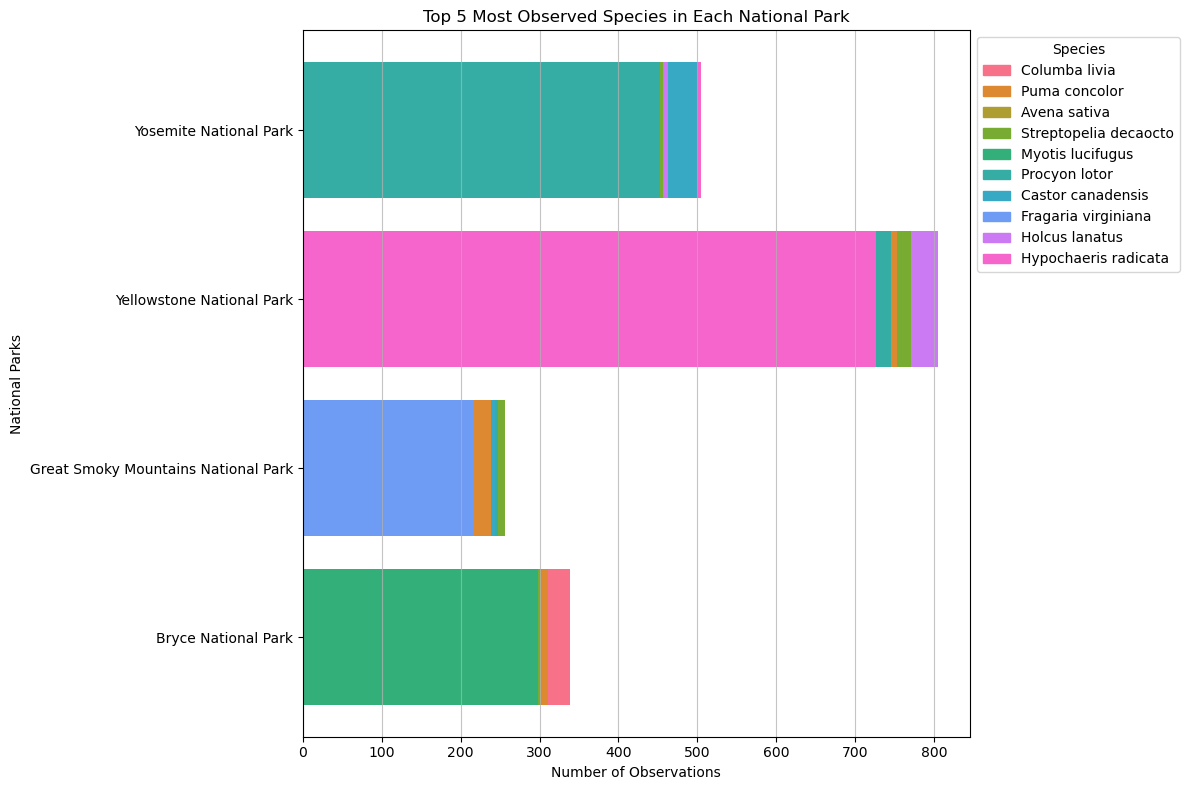

In [99]:
# Step 1: Aggregate the data to get total observations for each species in each park
total_observations = observations_df.groupby(['park_name', 'scientific_name'])['observations'].sum().reset_index()

# Step 2: Identify the top 5 most observed species in each park
top_species = total_observations.sort_values(['park_name', 'observations'], ascending=[True, False])
top_5_species = top_species.groupby('park_name').head(5)

# Step 3: Create the visualization

plt.figure(figsize=(12, 8))

# Assign a unique color to each species
unique_species = top_5_species['scientific_name'].unique()
colors = sns.color_palette("husl", len(unique_species))  # Use a seaborn color palette

# Plotting the bars for each park with unique colors for each species
for index, row in top_5_species.iterrows():
    plt.barh(row['park_name'], row['observations'], color=colors[list(unique_species).index(row['scientific_name'])])

# Set title and labels
plt.title('Top 5 Most Observed Species in Each National Park')
plt.xlabel('Number of Observations')
plt.ylabel('National Parks')

# Create a custom legend
handles = [plt.Rectangle((0,0),1,1, color=colors[i]) for i in range(len(unique_species))]
plt.legend(handles, unique_species, title='Species', loc='upper left', bbox_to_anchor=(1, 1))

plt.grid(axis='x', alpha=0.75)
plt.tight_layout()
plt.show()

**Comparison of species (categories) observations across parks: patterns and differences in biodiversity**

category                             Amphibian    Bird   Fish  Mammal  \
park_name                                                               
Bryce National Park                       7542   58590  12823   28830   
Great Smoky Mountains National Park       5876   42869   9482   21056   
Yellowstone National Park                19937  144300  31459   70701   
Yosemite National Park                   11713   86612  19137   42533   

category                             Nonvascular Plant  Reptile  \
park_name                                                         
Bryce National Park                              32992     8141   
Great Smoky Mountains National Park              24857     5841   
Yellowstone National Park                        83021    20061   
Yosemite National Park                           49783    11779   

category                             Vascular Plant  
park_name                                            
Bryce National Park                          48437

<Figure size 1200x800 with 0 Axes>

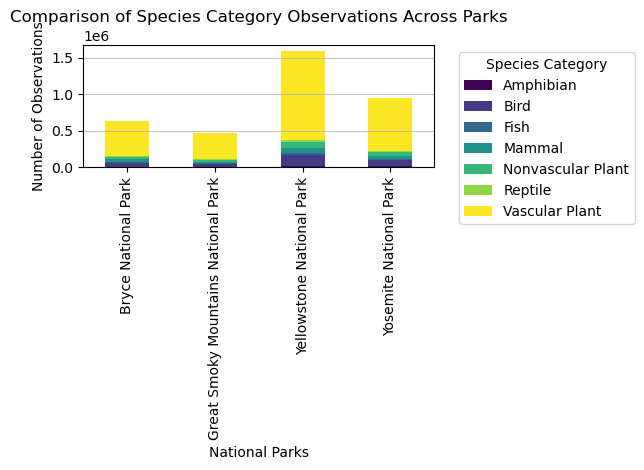

In [105]:
# Step 1: Merge the datasets on 'scientific_name'
merged_df = pd.merge(observations_df, species_info_df, on='scientific_name')

# Step 2: Aggregate the data to get total observations for each category in each park
category_observations = merged_df.groupby(['park_name', 'category'])['observations'].sum().unstack(fill_value=0)
print(category_observations)

# Step 3: Create a stacked bar chart
plt.figure(figsize=(12, 8))
category_observations.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Comparison of Species Category Observations Across Parks')
plt.xlabel('National Parks')
plt.ylabel('Number of Observations')
plt.legend(title='Species Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

## Species Information
**Conservation Status: endangered species and their distribution among parks**

<Figure size 1200x800 with 0 Axes>

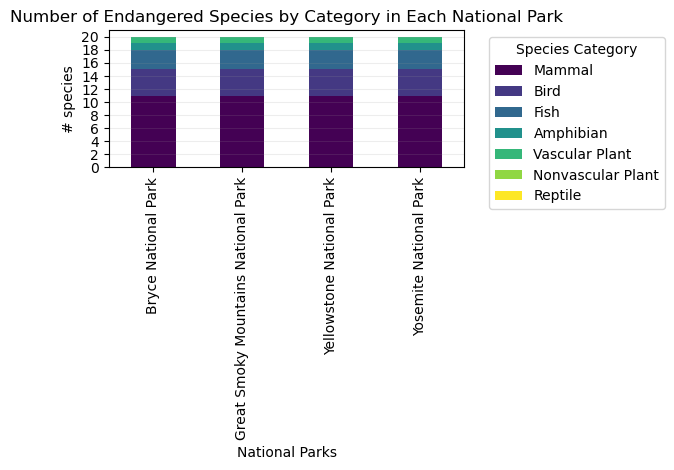

In [140]:
# Step 1: Filter the data for endangered species
endangered_species = merged_df[merged_df['conservation_status'] == 'Endangered']

# Step 2: Count endangered species by park and category
endangered_counts = endangered_species.groupby(['park_name', 'category']).size().unstack(fill_value=0)

# Step 3: Sort categories by total counts in descending order
sorted_categories = endangered_counts.sum().index
endangered_counts = endangered_counts[sorted_categories]

# Step 4: Create the visualization
plt.figure(figsize=(12, 8))
endangered_counts.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Number of Endangered Species by Category in Each National Park')
plt.xlabel('National Parks')
plt.ylabel('# species')

# Adding horizontal lines to the y-axis every 2 units
y_max = endangered_counts.sum(axis=1).max()  # Get the maximum value for the y-axis limit
plt.yticks(range(0, int(y_max) + 2, 2))  # Set ticks every 2 units
for y in range(0, int(y_max) + 2, 2):
    plt.axhline(y=y, color='gray', linewidth=0.5, alpha=0.1)  # Add horizontal lines with transparency

# Legend and grid settings
plt.legend(title='Species Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', alpha=0.1)
plt.tight_layout()
plt.show()

**Endemic & Rare species in each park**

In [188]:
# Step 1: Count observations by park, species and category
observation_counts = merged_df.groupby(['park_name', 'scientific_name', 'category'])['observations'].sum().reset_index()

# Step 2: Get the top 3 most observed species for each park (endemic species)
endemic_species = observation_counts.sort_values(by=['park_name', 'observations'], ascending=False).groupby('park_name').head(3)

# Step 3: Add the 'endemic_category' column
endemic_species = endemic_species.rename(columns={'category': 'endemic_category', 'scientific_name': 'endemic species'})

# Step 4: Get the top 3 least observed species for each park (rare species)
rare_species = observation_counts.sort_values(by=['park_name', 'observations']).groupby('park_name').head(3)

# Step 5: Add the 'rare_category' column
rare_species = rare_species.rename(columns={'category': 'rare_category', 'scientific_name': 'rare species'})

# Step 6: Combine the information into a single DataFrame
endemic_summary = endemic_species[['park_name', 'endemic species', 'endemic_category', 'observations']]
rare_summary = rare_species[['park_name', 'rare species', 'rare_category', 'observations']]

# Combine the two summaries into a single DataFrame
combined_summary = pd.concat([
    endemic_summary.assign(Type='Endemic'),
    rare_summary.assign(Type='Rare')
], ignore_index=True)

# Combine columns into a single descriptive column
combined_summary['Description'] = (
    combined_summary['endemic species'].fillna(combined_summary['rare species']) + ' | ' +
    combined_summary['endemic_category'].fillna(combined_summary['rare_category']) + ' | ' +
    combined_summary['observations'].astype(str)
)

# Final DataFrame with only relevant columns
final_summary = combined_summary[['park_name', 'Description', 'Type']]
print(final_summary)

                              park_name  \
0                Yosemite National Park   
1                Yosemite National Park   
2                Yosemite National Park   
3             Yellowstone National Park   
4             Yellowstone National Park   
5             Yellowstone National Park   
6   Great Smoky Mountains National Park   
7   Great Smoky Mountains National Park   
8   Great Smoky Mountains National Park   
9                   Bryce National Park   
10                  Bryce National Park   
11                  Bryce National Park   
12                  Bryce National Park   
13                  Bryce National Park   
14                  Bryce National Park   
15  Great Smoky Mountains National Park   
16  Great Smoky Mountains National Park   
17  Great Smoky Mountains National Park   
18            Yellowstone National Park   
19            Yellowstone National Park   
20            Yellowstone National Park   
21               Yosemite National Park   
22         

# Conclusions